# Task 1: Prediction using Supervised ML
## By: Mansi Modi
## The Sparks Foundation, Data Science & Business Analytics Intern

In [22]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [23]:
#loading the dataset
data = pd.read_csv('http://bit.ly/w-data')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [24]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


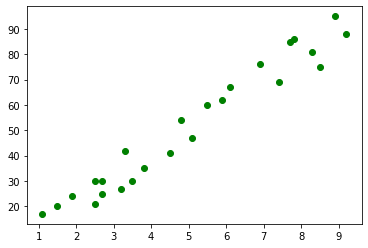

In [26]:
#scatter plot
plt.scatter(x = data['Hours'], y = data['Scores'], color = 'green') 
plt.show()

In [27]:
#coefficient of correlation and co-variance of data
print(np.corrcoef(data.Hours, data.Scores) )
print(data.cov())

[[1.         0.97619066]
 [0.97619066 1.        ]]
          Hours      Scores
Hours    6.3761   62.331500
Scores  62.3315  639.426667


In [28]:
#model building
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values


train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [29]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Applying Linear Regression model to the dataset")

Applying Linear Regression model to the dataset


In [30]:
pred_y = regression.predict(val_X)
predict = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted_Marks': [k for k in pred_y]})
predict

,Hours,Predicted_Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [31]:
#actual and predected marks
df_scores = pd.DataFrame({'Actual_Marks': val_y, 'Predicted_Marks': pred_y})
df_scores

,Actual_Marks,Predicted_Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


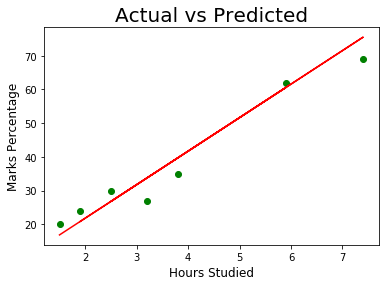

In [32]:
plt.scatter(x=val_X, y=val_y, color='green')
plt.plot(val_X, pred_y, color='red')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [33]:
print('Mean_absolute_error: ',mean_absolute_error(val_y,pred_y))

Mean_absolute_error:  4.130879918502486


In [34]:
hours = [9.25]
score = regression.predict([hours])
print("Score = {}".format(round(score[0],3)))

Score = 93.893


from linear regression model we can conclude that if a person works for 9.25 hrs he will be able to score 93.893 marks